<a href="https://colab.research.google.com/github/Md819-max/site/blob/main/JP_morgan__natural_gas_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-7-1775957570.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dates'] = pd.to_datetime(df['Dates'])  # Convert to datetime


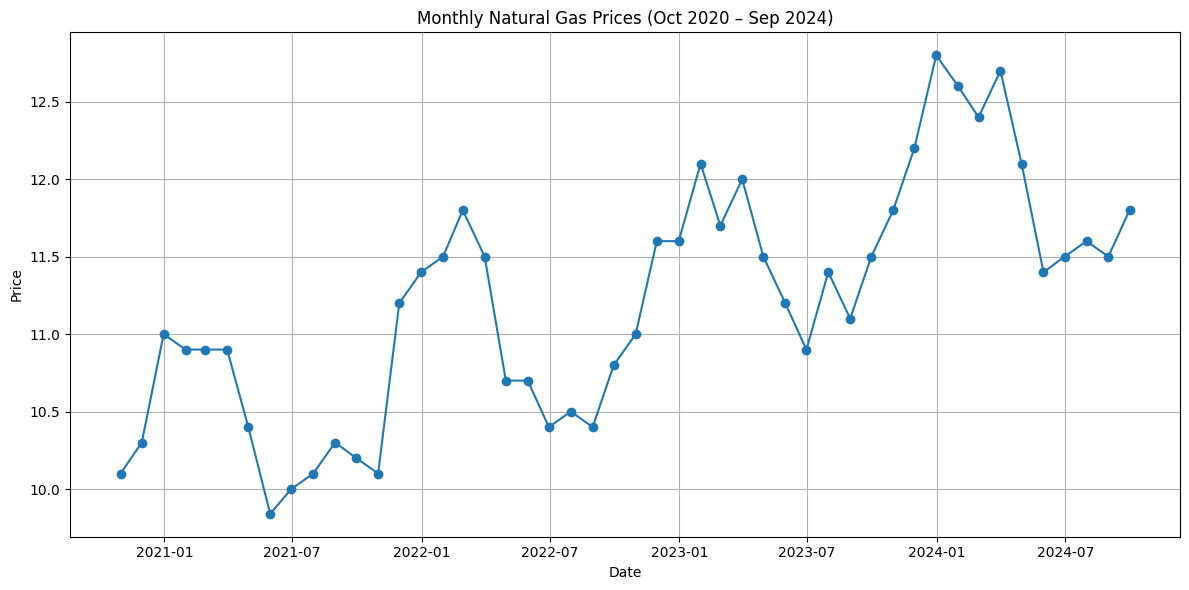

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/tmp/ipython-input-7-1775957570.py:55: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start="2024-10-31", end="2025-09-30", freq='M')
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Predicted price for 2025-05-15: 12.42

📈 Forecasted Prices for Oct 2024 – Sep 2025:
         Date  Forecasted Price
0  2024-10-31             12.16
1  2024-11-30             12.20
2  2024-12-31             12.24
3  2025-01-31             12.28
4  2025-02-28             12.32
5  2025-03-31             12.36
6  2025-04-30             12.40
7  2025-05-31             12.44
8  2025-06-30             12.47
9  2025-07-31             12.51
10 2025-08-31             12.55
11 2025-09-30             12.59


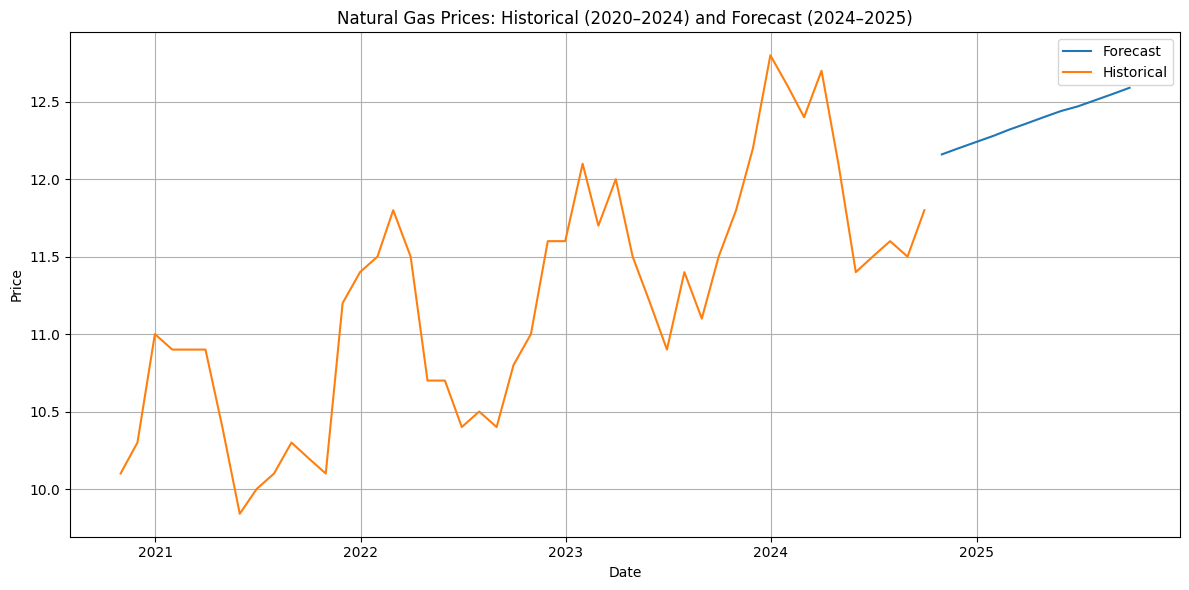

In [7]:
# 📦 STEP 1: Import necessary libraries for data handling, modeling, and plotting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import datetime as dt

# 📂 STEP 2: Load the CSV file containing natural gas prices

df = pd.read_csv("/content/Nat_Gas (3).csv")  # Example file name

#  STEP 3: Convert the 'Dates' column to proper datetime format and set it as the index
df['Dates'] = pd.to_datetime(df['Dates'])
df.set_index('Dates', inplace=True)

# 📊 STEP 4: Plot the historical natural gas
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Prices'], marker='o')
plt.title('Monthly Natural Gas Prices (Oct 2020 – Sep 2024)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.tight_layout()
plt.show()

# STEP 5: Train a Linear Regression model to learn from the historical price trend
# Convert dates to numeric form (ordinal) for regression
df_reset = df.reset_index()
df_reset['Timestamp'] = df_reset['Dates'].map(dt.datetime.toordinal)

X = df_reset[['Timestamp']]
y = df_reset['Prices']


model = LinearRegression()
model.fit(X, y)

# 🔍 STEP 6: Create a function to predict price for any given date
def estimate_price(date_str):
    """
    Estimate the price of natural gas for any given date in 'YYYY-MM-DD' format.
    """
    try:
        date_obj = pd.to_datetime(date_str)
        ordinal = np.array([[date_obj.toordinal()]])
        predicted_price = model.predict(ordinal)[0]
        return round(predicted_price, 2)
    except:
        return "❌ Invalid date format. Please use 'YYYY-MM-DD'."

# Example usage:
print("Predicted price for 2025-05-15:", estimate_price("2025-05-15"))

# STEP 7: Forecast natural gas prices for the next 12 months (Oct 2024 – Sep 2025)
future_dates = pd.date_range(start="2024-10-31", end="2025-09-30", freq='M')
future_ordinals = future_dates.map(dt.datetime.toordinal).values.reshape(-1, 1)
future_prices = model.predict(future_ordinals)

# Build a DataFrame to show the forecasted results
forecast_df = pd.DataFrame({
    "Date": future_dates,
    "Forecasted Price": np.round(future_prices, 2)
})
print("\n📈 Forecasted Prices for Oct 2024 – Sep 2025:")
print(forecast_df)

# STEP 8: Plot both historical prices and future predictions on the same graph
# Prepare historical data for plotting
df_hist = df.copy()
df_hist = df_hist.rename(columns={"Prices": "Price"})
df_hist["Type"] = "Historical"

# Prepare forecast data for plotting
forecast_df_viz = forecast_df.copy()
forecast_df_viz = forecast_df_viz.rename(columns={"Forecasted Price": "Price"})
forecast_df_viz["Type"] = "Forecast"
forecast_df_viz.set_index("Date", inplace=True)

# Combine both datasets for visualization
combined_df = pd.concat([df_hist[["Price", "Type"]], forecast_df_viz[["Price", "Type"]]])

# Final plot with both historical and forecasted prices
plt.figure(figsize=(12, 6))
for label, group in combined_df.groupby("Type"):
    plt.plot(group.index, group["Price"], label=label)

plt.title("Natural Gas Prices: Historical (2020–2024) and Forecast (2024–2025)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
